# Exploration

In [1]:
import json

In [4]:
with open('../data/coco/annotations/instances_val2017.json') as f:
    annotations = json.load(f)

In [5]:
annotations.keys()

dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])

In [6]:
annotations['images'][0]

{'license': 4,
 'file_name': '000000397133.jpg',
 'coco_url': 'http://images.cocodataset.org/val2017/000000397133.jpg',
 'height': 427,
 'width': 640,
 'date_captured': '2013-11-14 17:02:52',
 'flickr_url': 'http://farm7.staticflickr.com/6116/6255196340_da26cf2c9e_z.jpg',
 'id': 397133}

In [7]:
annotations['annotations'][0]

{'segmentation': [[510.66,
   423.01,
   511.72,
   420.03,
   510.45,
   416.0,
   510.34,
   413.02,
   510.77,
   410.26,
   510.77,
   407.5,
   510.34,
   405.16,
   511.51,
   402.83,
   511.41,
   400.49,
   510.24,
   398.16,
   509.39,
   397.31,
   504.61,
   399.22,
   502.17,
   399.64,
   500.89,
   401.66,
   500.47,
   402.08,
   499.09,
   401.87,
   495.79,
   401.98,
   490.59,
   401.77,
   488.79,
   401.77,
   485.39,
   398.58,
   483.9,
   397.31,
   481.56,
   396.35,
   478.48,
   395.93,
   476.68,
   396.03,
   475.4,
   396.77,
   473.92,
   398.79,
   473.28,
   399.96,
   473.49,
   401.87,
   474.56,
   403.47,
   473.07,
   405.59,
   473.39,
   407.71,
   476.68,
   409.41,
   479.23,
   409.73,
   481.56,
   410.69,
   480.4,
   411.85,
   481.35,
   414.93,
   479.86,
   418.65,
   477.32,
   420.03,
   476.04,
   422.58,
   479.02,
   422.58,
   480.29,
   423.01,
   483.79,
   419.93,
   486.66,
   416.21,
   490.06,
   415.57,
   492.18,
   416.85,

In [9]:
annotations['images'][0]

{'license': 4,
 'file_name': '000000397133.jpg',
 'coco_url': 'http://images.cocodataset.org/val2017/000000397133.jpg',
 'height': 427,
 'width': 640,
 'date_captured': '2013-11-14 17:02:52',
 'flickr_url': 'http://farm7.staticflickr.com/6116/6255196340_da26cf2c9e_z.jpg',
 'id': 397133}

In [6]:
idx_to_classes = {cat['id']: cat['name'] for cat in annotations['categories']}

In [7]:
idx_to_classes

{1: 'person',
 2: 'bicycle',
 3: 'car',
 4: 'motorcycle',
 5: 'airplane',
 6: 'bus',
 7: 'train',
 8: 'truck',
 9: 'boat',
 10: 'traffic light',
 11: 'fire hydrant',
 13: 'stop sign',
 14: 'parking meter',
 15: 'bench',
 16: 'bird',
 17: 'cat',
 18: 'dog',
 19: 'horse',
 20: 'sheep',
 21: 'cow',
 22: 'elephant',
 23: 'bear',
 24: 'zebra',
 25: 'giraffe',
 27: 'backpack',
 28: 'umbrella',
 31: 'handbag',
 32: 'tie',
 33: 'suitcase',
 34: 'frisbee',
 35: 'skis',
 36: 'snowboard',
 37: 'sports ball',
 38: 'kite',
 39: 'baseball bat',
 40: 'baseball glove',
 41: 'skateboard',
 42: 'surfboard',
 43: 'tennis racket',
 44: 'bottle',
 46: 'wine glass',
 47: 'cup',
 48: 'fork',
 49: 'knife',
 50: 'spoon',
 51: 'bowl',
 52: 'banana',
 53: 'apple',
 54: 'sandwich',
 55: 'orange',
 56: 'broccoli',
 57: 'carrot',
 58: 'hot dog',
 59: 'pizza',
 60: 'donut',
 61: 'cake',
 62: 'chair',
 63: 'couch',
 64: 'potted plant',
 65: 'bed',
 67: 'dining table',
 70: 'toilet',
 72: 'tv',
 73: 'laptop',
 74: 'mo

In [8]:
classes_to_idx = {name: idx for (idx, name) in idx_to_classes.items()}

In [9]:
# coco bboxes are: [x_min, y_min, width, height]

# Preparing data

In [20]:
from glob import glob

In [21]:
saved_images = glob('../data/coco/images/*.jpg')
saved_images = set([img.split('/')[-1] for img in saved_images])

In [22]:
desired_classes = set([classes_to_idx['cat'], classes_to_idx['dog']])

In [23]:
annotation_data = {img['id']: [img] for img in annotations['images']
                   if img['file_name'] in saved_images}

In [24]:
for ann in annotations['annotations']:
    img_id = ann['image_id']
    class_id = ann['category_id']
    if img_id in annotation_data and class_id in desired_classes:
        annotation_data[img_id].append(ann)

# Visualization

In [25]:
from pathlib import Path

import matplotlib.pyplot as plt
from PIL import Image

In [26]:
def visualize_annotation(image_data,
                         annotations,
                         base_img_path='../data/coco/images/',
                         figsize=(10, 10)):
    base_img_path = Path(base_img_path)
    img = Image.open(base_img_path/image_data['file_name'])
    
    plt.figure(figsize=figsize)
    plt.imshow(img)
    ax = plt.gca()
    for ann in annotations:
        x, y, w, h = ann['bbox']
        print(x, y, w, h)
        ax.add_patch(plt.Rectangle((x, y), w, h, fill=False, color='r', linewidth=4))

In [27]:
keys_iter = iter(annotation_data.keys())

0.0 165.76 172.5 212.01


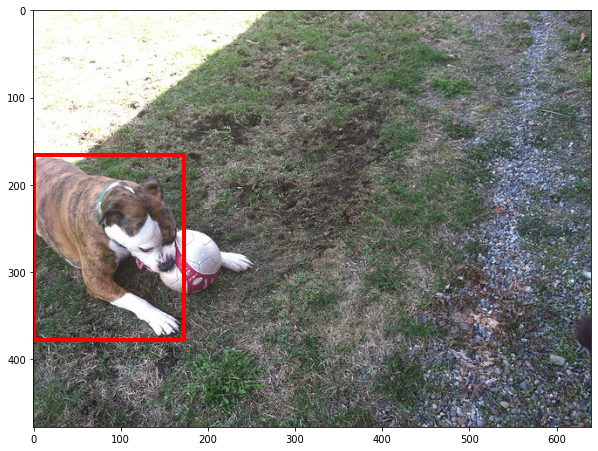

In [32]:
annotation = annotation_data[next(keys_iter)]
visualize_annotation(annotation[0], annotation[1:])